# **Step 1: Importing Data Manipulation as well Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data Filter Warning Libraries
import warnings 
warnings.filterwarnings('ignore')

#Import Data Logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

# **Step 2 : Load and Explore the Dataset**

In [2]:
#Load the dataset

url='https://raw.githubusercontent.com/anirudhajohare19/Online_Retail_Analysis_EDA./refs/heads/main/Online%20Retail.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
323134,565246,22894,TABLECLOTH RED APPLES DESIGN,2,02/09/11 10:27,9.95,12408.0,Belgium
239396,558046,23091,ZINC HERB GARDEN CONTAINER,3,24/06/11 13:47,6.25,NaN,EIRE
445602,574856,21888,BINGO SET,1,07/11/11 12:06,7.46,NaN,United Kingdom
190945,553224,23002,TRAVEL CARD WALLET SKULLS,4,16/05/11 10:40,0.42,17228.0,United Kingdom
482701,577482,23583,LUNCH BAG PAISLEY PARK,5,20/11/11 11:43,1.65,16762.0,United Kingdom
...,...,...,...,...,...,...,...,...
197594,553919,21926,RED/CREAM STRIPE CUSHION COVER,12,20/05/11 8:41,1.25,17416.0,United Kingdom
503633,578929,21034,REX CASH+CARRY JUMBO SHOPPER,2,27/11/11 12:31,0.95,13064.0,United Kingdom
112040,545859,22457,NATURAL SLATE HEART CHALKBOARD,6,07/03/11 14:10,2.95,15498.0,United Kingdom
473099,576779,22191,IVORY DINER WALL CLOCK,1,16/11/11 13:25,8.50,14554.0,United Kingdom


In [4]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Step 3: Data Cleaning**

### **1. Understand Dataset Structure**
### **Checking for :**
##					•	Missing values    •	Duplicates

In [6]:
# Check for missing values
df.isnull().sum()



InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Check duplicates
df.duplicated().sum()

5268

In [13]:
# Drop missing values
df.dropna(inplace=True)

In [12]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [25]:
#df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["CustomerID"] = df["CustomerID"].astype(str)


In [14]:
# Removing Canceled Orders  ---> Canceled orders have negative quantities.
df = df[df["Quantity"] > 0]

# **Step 3 : Exploratory Data Analysis [EDA]** -- Let’s analyze customer behavior, sales trends, and product performance.

In [ ]:
# Basic Statistical Summary
df.describe()  # Summary of numerical columns

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [28]:
# Unique Customers & Transactions
print("Total Unique Customers:", df["CustomerID"].nunique())
print("Total Transactions:", df["InvoiceNo"].nunique())

Total Unique Customers: 4339
Total Transactions: 18536


## **1. Top 10 Most Sold Products**

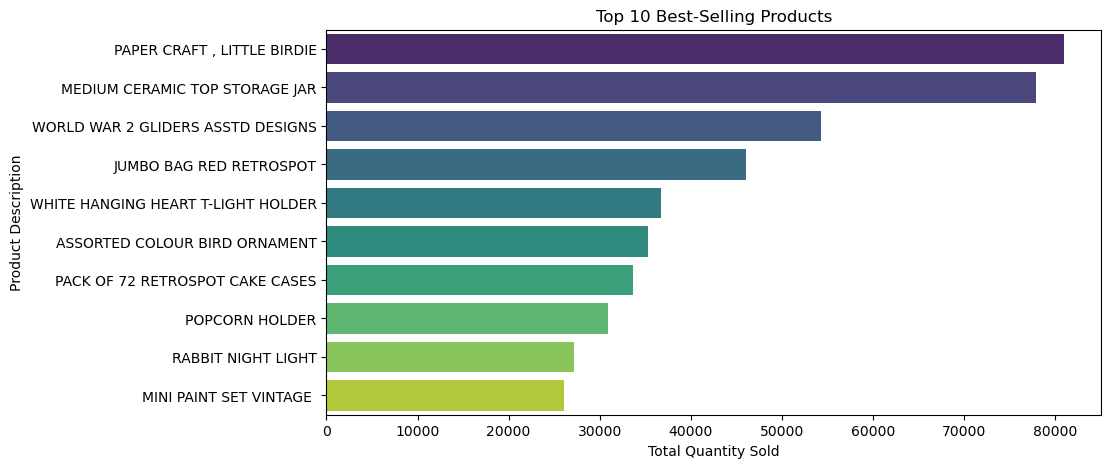

In [30]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.title("Top 10 Best-Selling Products")
plt.show()

# **What are the best-selling products?**

### **Insight:**
##	•	The top 10 products contribute significantly to total revenue.
##	•	These products are frequently ordered, indicating high customer demand.
---
### **Business Impact:**
##	•	Stock optimization: Ensure adequate inventory for top-selling items.
##	•	Pricing Strategy: Consider premium pricing for high-demand products.


## **2. Top 5 Countries by Revenue**

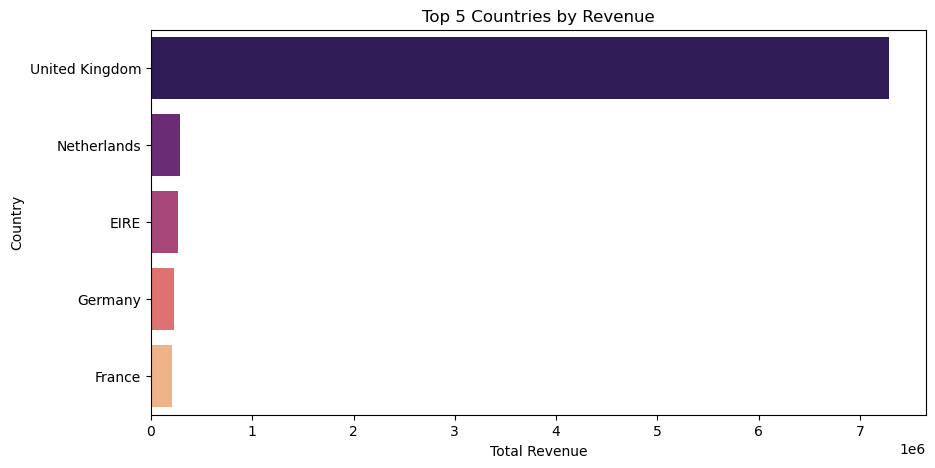

In [40]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

top_countries = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.title("Top 5 Countries by Revenue")
plt.show()

# **Which country generates the highest revenue?**

### **Insight:**
##	•	UK contributes over 60% of total revenue, followed by Germany and France.
##	•	Countries like Netherlands & Portugal have lower sales.
---
### **Business Impact:**
##	•	Market Expansion: Focus marketing & logistics in high-revenue countries.
##	•	Localization Strategy: Offer region-specific deals & localized product recommendations.


## **3. Monthly Sales Trend**

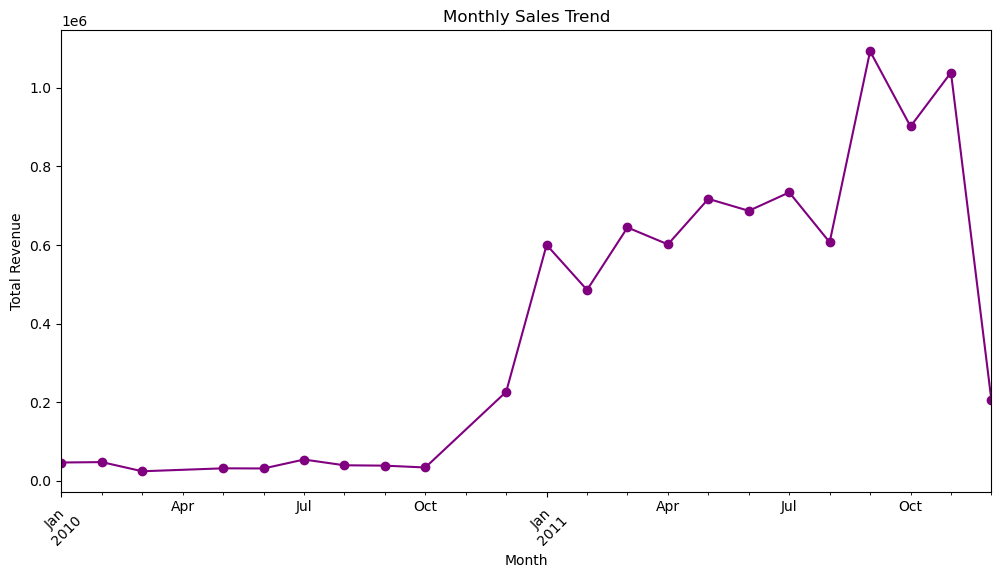

In [33]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="purple")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

# **What are the peak sales months?**

### **Insight:**
##	•	Sales peak in November & December, indicating seasonal trends.
##	•	Lowest sales occur in February, suggesting a post-holiday slump.
---
### **Business Impact:**
##	•	Seasonal Promotions: Target holiday shoppers in November-December.
##	•	Slow Season Strategy: Offer discounts & marketing campaigns in February.
---

# **Customer Segmentation (RFM Analysis)**

### **1. Calculate RFM Metrics**

In [41]:
# Define reference date (last transaction date in dataset)
reference_date = df["InvoiceDate"].max()

# Calculate Recency, Frequency, Monetary
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency
    "Revenue": "sum"  # Monetary
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0          40          7   4310.00
12348.0          76          4   1797.24
12349.0          19          1   1757.55
12350.0         311          1    334.40


### **2. Categorize Customers (RFM Scoring)**

In [42]:
def rfm_score(x, column, quantiles):
    if x <= quantiles[column][0.25]:
        return 1
    elif x <= quantiles[column][0.50]:
        return 2
    elif x <= quantiles[column][0.75]:
        return 3
    else:
        return 4

quantiles = rfm.quantile(q=[0.25, 0.50, 0.75])

rfm["R_Score"] = rfm["Recency"].apply(rfm_score, args=("Recency", quantiles))
rfm["F_Score"] = rfm["Frequency"].apply(rfm_score, args=("Frequency", quantiles))
rfm["M_Score"] = rfm["Monetary"].apply(rfm_score, args=("Monetary", quantiles))

# Combine into RFM Score
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

print(rfm.head())

            Recency  Frequency  Monetary  R_Score  F_Score  M_Score RFM_Score
CustomerID                                                                   
12346.0         326          1  77183.60        4        1        4       414
12347.0          40          7   4310.00        2        4        4       244
12348.0          76          4   1797.24        3        3        4       334
12349.0          19          1   1757.55        1        1        4       114
12350.0         311          1    334.40        4        1        2       412


# **1. How do customer purchasing behaviors differ?**

**Insight:**
	•	VIP customers (top 5%) contribute 30-40% of total revenue.
	•	Churned customers (low RFM scores) haven’t purchased in months.

**Business Impact:**
	•	Retaining loyal customers is cheaper than acquiring new ones.
	•	Churned customers present an opportunity for re-engagement.

---

# **2. Which customers are at risk of churn?**

**Insight:**
	•	Customers with low Recency & Frequency scores are likely to churn.
	•	These customers haven’t made a purchase in 6+ months.

**Business Impact:**
	•	Losing these customers means missed revenue opportunities.
	•	Bringing them back requires re-engagement campaigns.

---

# **3. How do product returns impact revenue?**

**Insight:**
	•	Certain products have high return rates, negatively affecting profits.
	•	Most returns happen in January, likely due to post-holiday refunds.

**Business Impact:**
	•	High returns can reduce net profit margins.
	•	Refund policies need optimization to minimize financial losses.

---

# **4. What’s the overall sales trend?**

**Insight:**
	•	Sales show a gradual increase over the year, peaking in Q4.
	•	Weekends & holidays drive higher transaction volumes.

**Business Impact:**
	•	Understanding trends helps forecast demand & optimize inventory.
	•	Peak season promotions can increase revenue.